In [4]:
import pandas as pd
data=pd.read_csv(r'F:\SAUVGARDE 2020\user\Desktop\data.csv',sep=';')
data.head()
one_hot=pd.get_dummies(data['Title'])
data=data.drop('Title',axis= 1)
data=data.join(one_hot)
one_hot=pd.get_dummies(data['Embarked'])
data=data.drop('Embarked',axis= 1)
data=data.join(one_hot)
data 

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Master,Miss,Mrs,Officer,Royalty,C,Q,S
0,0,0,2,1,28,0,0,13,0,0,0,1,0,0,0,0,1
1,1,0,3,1,25,0,0,"7,65",0,0,0,1,0,0,0,0,1
2,2,0,3,1,20,0,0,"7,8542",0,0,0,1,0,0,0,0,1
3,3,0,3,0,29,0,4,"21,075",4,0,0,1,0,0,0,0,1
4,4,0,1,1,31,1,0,52,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,1,2,0,14,1,0,"30,0708",1,0,0,1,0,0,1,0,0
887,887,0,3,1,22,0,0,"7,2292",0,0,0,1,0,0,1,0,0
888,888,0,3,0,30,0,0,"8,6625",0,0,1,0,0,0,0,0,1
889,889,0,3,1,29,0,0,"7,8958",0,0,0,1,0,0,0,0,1


In [6]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = data[['Pclass', 'FamilySize','Sex','C','S','Q','Master','Miss','Mrs','Officer','Royalty']]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.84


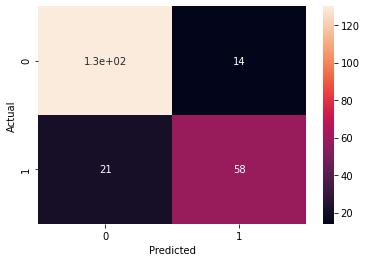

In [7]:
import seaborn as sns
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       144
           1       0.81      0.73      0.77        79

    accuracy                           0.84       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.84      0.84      0.84       223



In [9]:
#logistical regression sur ces données est meilleur pour déterminer le nombre de non survivants


AUC Score: 0.86


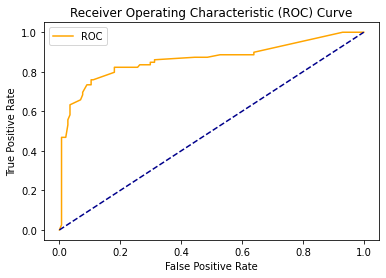

In [10]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc,accuracy_score, classification_report,roc_auc_score
import matplotlib.pyplot as plt
pred_prob = logreg.predict_proba(x_test)
probs = pred_prob[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC Score: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [11]:
#ROC axe x false positive & axe y true positive
#l'AUC comme une mesure de la probabilité pour que le modèle classe un exemple positif aléatoire au-dessus d'un exemple négatif aléatoire